In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [2]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10, random_state=123):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rd = np.random.RandomState(self.random_state)
        self.w_ = rd.normal(0, 0.1, X.shape[1] + 1)
        self.errors_ = []
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.errors_.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

In [3]:
import pandas as pd

In [4]:
file_path = 'Datasets/Iris DataSet/iris.data'
df = pd.read_csv(file_path, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Target
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

# DataSet
X = df.iloc[0:100, [0,2]].values

Text(0, 0.5, 'Update Count')

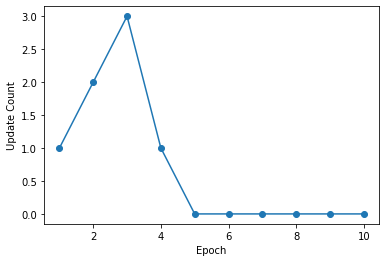

In [6]:
percep = Perceptron()
percep.fit(X, y)

%matplotlib inline

plt.plot(range(1, len(percep.errors_)+1),
        percep.errors_,
        marker='o')
plt.xlabel('Epoch')
plt.ylabel('Update Count')

In [7]:
date = '27/03/2020 9:00AM'

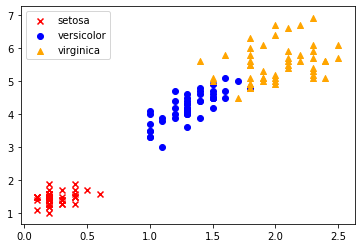

In [8]:
X = df.iloc[0:, [0,1,2,3]].values
xaxis = 3
yaxis = 2
plt.scatter(X[:50, xaxis], X[:50, yaxis], color='red', marker='x', label='setosa')
plt.scatter(X[51:100, xaxis], X[51:100, yaxis], color='blue', marker='o', label='versicolor')
plt.scatter(X[101:, xaxis], X[101:, yaxis], color='orange', marker='^', label='virginica')
plt.legend(loc='upper left')

In [38]:
icmr = pd.read_csv('Datasets\Covid19\ICMRTestingDetails.csv',delimiter='\t')
icmr.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 0:00,6500,5900,78,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125,12235,150,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 10:00,13316,12426,168,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/03/20 18:00,14175,13285,182,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/03/20 10:00,14376,13486,206,ICMR_website_update_20March_10AM_IST.pdf


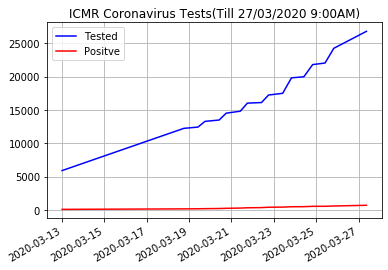

In [39]:
df = icmr.iloc[:,[1,3,4]].values
df[:,0] = pd.to_datetime(df[:,0])

datetime = df[:,0]
total = df[:,1]
positive = df[:,2]

plt.plot(datetime, total, color='blue', label='Tested')
plt.plot(datetime, positive, color='red', label='Positve')
plt.gcf().autofmt_xdate()

plt.legend(loc='upper left')
plt.title(label='ICMR Coronavirus Tests(Till ' + date + ')')
plt.grid(True)
plt.savefig('ICMR.png', dpi=1200)
plt.show()

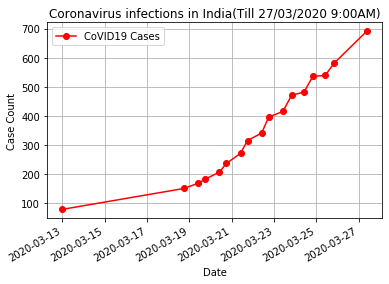

In [40]:
plt.plot(datetime, positive, label="CoVID19 Cases", marker='o', color='red')
plt.xlabel("Date")
plt.ylabel("Case Count")
plt.gcf().autofmt_xdate()
plt.title('Coronavirus infections in India(Till ' + date + ')')
plt.legend(loc="upper left")
plt.grid(True)
plt.savefig('corona_growth.png', dpi=1200)
plt.show()

In [41]:
prev_test = 0
prev_pos = 0 
for i in range(len(df)):
    row = df[i]
    
    test = row[1] - prev_test
    pos = row[2] - prev_pos
    prev_test, row[1] = row[1], test
    prev_pos, row[2] = row[2], pos
    

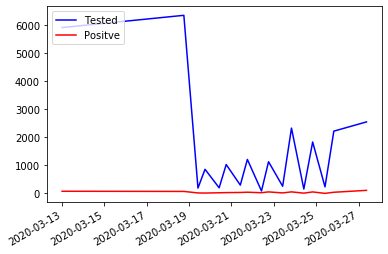

In [42]:
labels = ['Individuals Tested','Positive']
datetime = df[:,0]
tests = df[:,1]
positive = df[:,2]

plt.plot(datetime, tests, color='blue', label='Tested')
plt.plot(datetime, positive, color='red', label='Positve')
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left')
plt.show()

#### Note: Data for March 26th is missing in this dataset, it might cause some irregularity in the visualization  

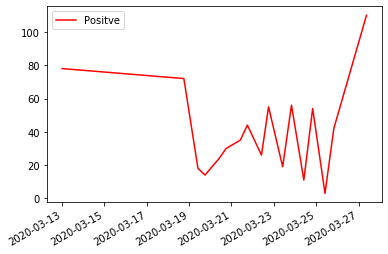

In [43]:
plt.plot(datetime, positive, color='red', label='Positve')
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left')
plt.show()

In [44]:
age_csv = pd.read_csv('Datasets/covid19/AgeGroupDetails.csv',delimiter=',')
age_csv.tail()

,Sno,AgeGroup,TotalCases,Percentage
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [50]:
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText

class MyAxes(matplotlib.axes.Axes):
    def __init__(self, *args, **kwargs):

        super().__init__(*args, **kwargs)
        ab = AnchoredText("©laxmena", loc="center", frameon=False,
                          borderpad=0, prop=dict(alpha=0.5))
        ab.set_zorder(0)
        self.add_artist(ab)

matplotlib.axes.Axes = MyAxes

0
Wedge(center=(0, 0), r=1, theta1=-30, theta2=-18.5531, width=0.5)
1
Wedge(center=(0, 0), r=1, theta1=-18.5531, theta2=-4.51455, width=0.5)
2
Wedge(center=(0, 0), r=1, theta1=-4.51455, theta2=84.9725, width=0.5)
3
Wedge(center=(0, 0), r=1, theta1=84.9725, theta2=160.925, width=0.5)
4
Wedge(center=(0, 0), r=1, theta1=160.925, theta2=219.167, width=0.5)
5
Wedge(center=(0, 0), r=1, theta1=219.167, theta2=259.231, width=0.5)
6
Wedge(center=(0, 0), r=1, theta1=259.231, theta2=305.522, width=0.5)
7
Wedge(center=(0, 0), r=1, theta1=305.522, theta2=320.101, width=0.5)
8
Wedge(center=(0, 0), r=1, theta1=320.101, theta2=325.32, width=0.5)
9
Wedge(center=(0, 0), r=1, theta1=325.32, theta2=330, width=0.5)


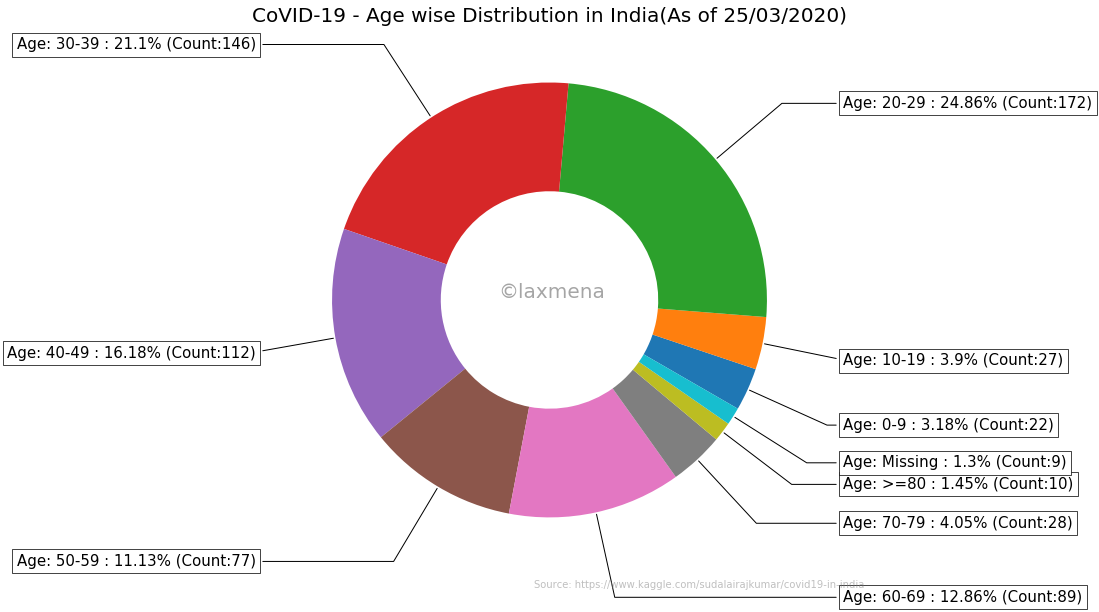

In [103]:
df = age_csv.iloc[:,[1,2,3]].values
percent = [float(stringPercent.strip('%')) for stringPercent in df[:,2]]
count = df[:,1]
labels = df[:,0]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(percent, wedgeprops=dict(width=0.5), startangle=-30)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    print(i)
    print(p)
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate('Age: ' + labels[i] + ' : ' + str(percent[i])+ '% (Count:' + str(count[i]) + ')', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=15)

ax.set_title('CoVID-19 - Age wise Distribution in India(As of 25/03/2020)',fontsize=20)


fig.text(0.59, 0.5, '©laxmena',
         fontsize=20, color='gray',
         ha='right', va='bottom', alpha=0.7)

fig.text(0.95, 0.10, 'Source: https://www.kaggle.com/sudalairajkumar/covid19-in-india',
         fontsize=10, color='gray',
         ha='right', va='bottom', alpha=0.5)

# plt.savefig('Age_distribution.png', dpi=1200, bbox_inches='tight')

plt.show()